In [3]:
import pandas as pd, networkx as nx
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../')
import trace_analysis
import plots_analysis
import trace_statistics

Invalid IHDR data. Cannot save the image grid9_normal_2019-02-11_21:03:19_hist.png
Invalid IHDR data. Cannot save the image grid9_normal_2019-02-12_14:02:32_hist.png
Invalid IHDR data. Cannot save the image grid9_normal_2019-02-12_14:22:43_hist.png


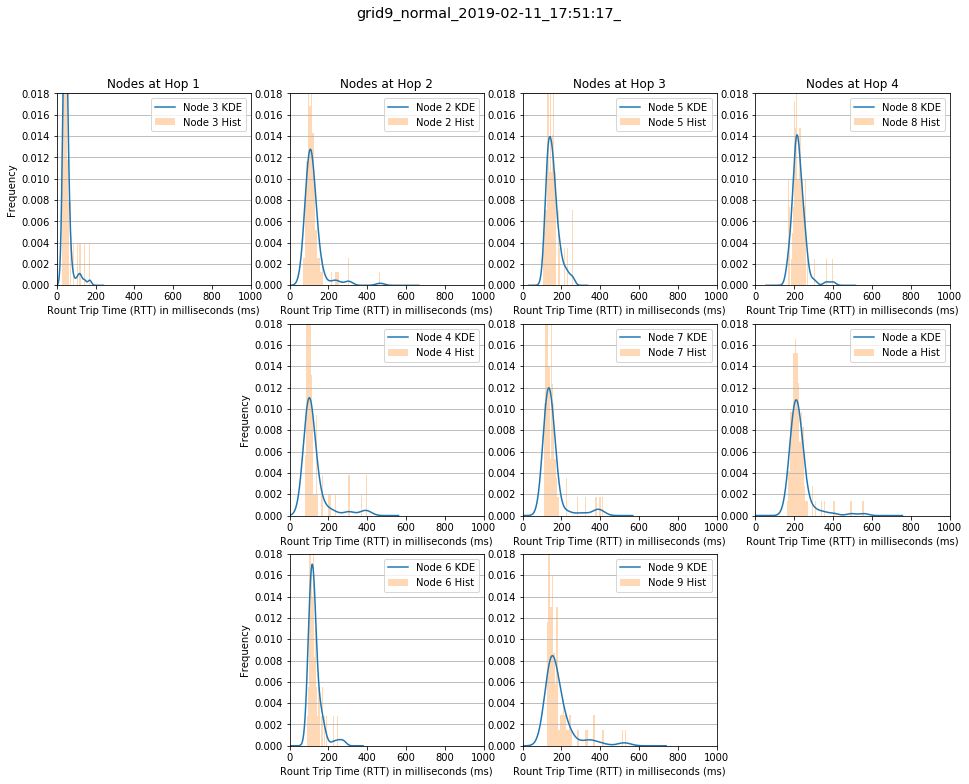

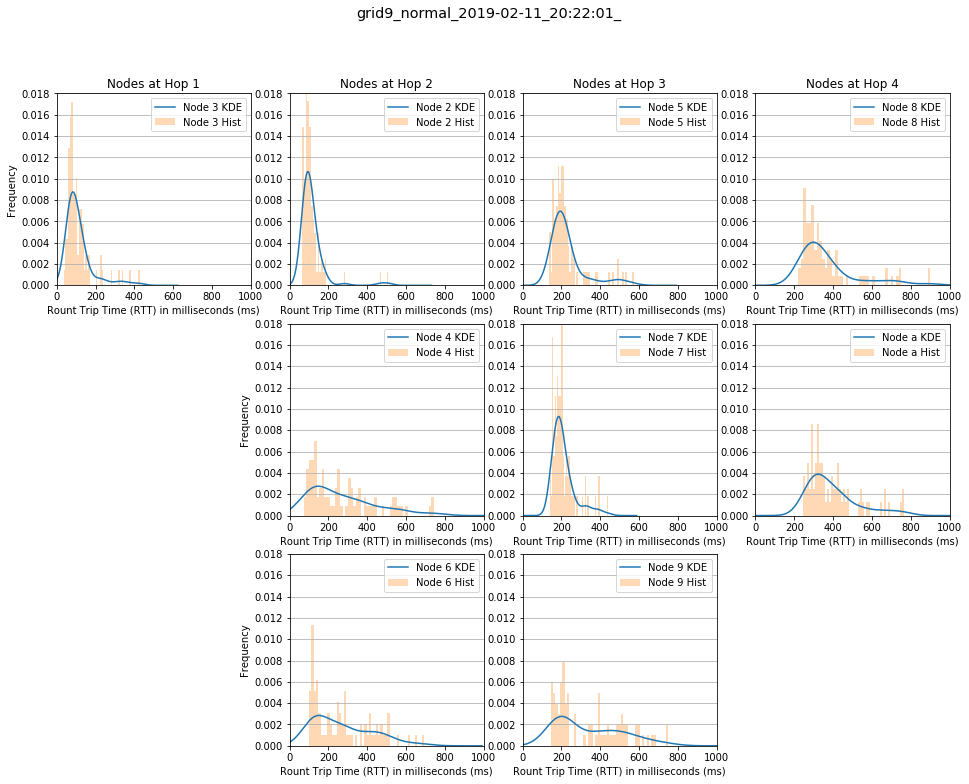

<Figure size 0x0 with 0 Axes>

<Figure size 0x0 with 0 Axes>

<Figure size 0x0 with 0 Axes>

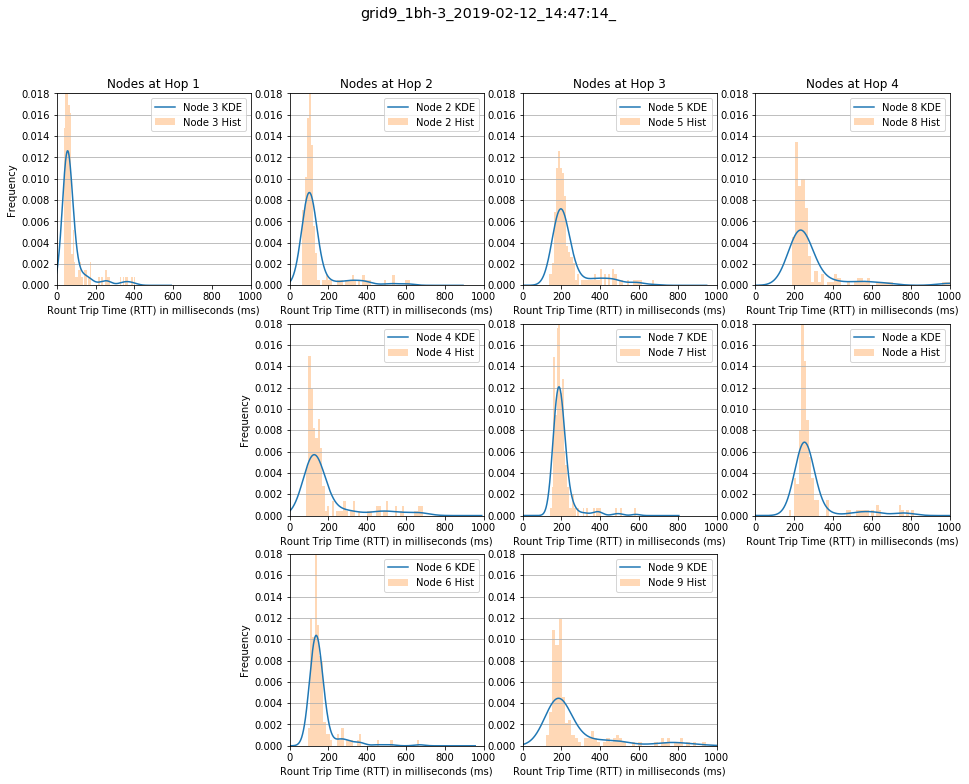

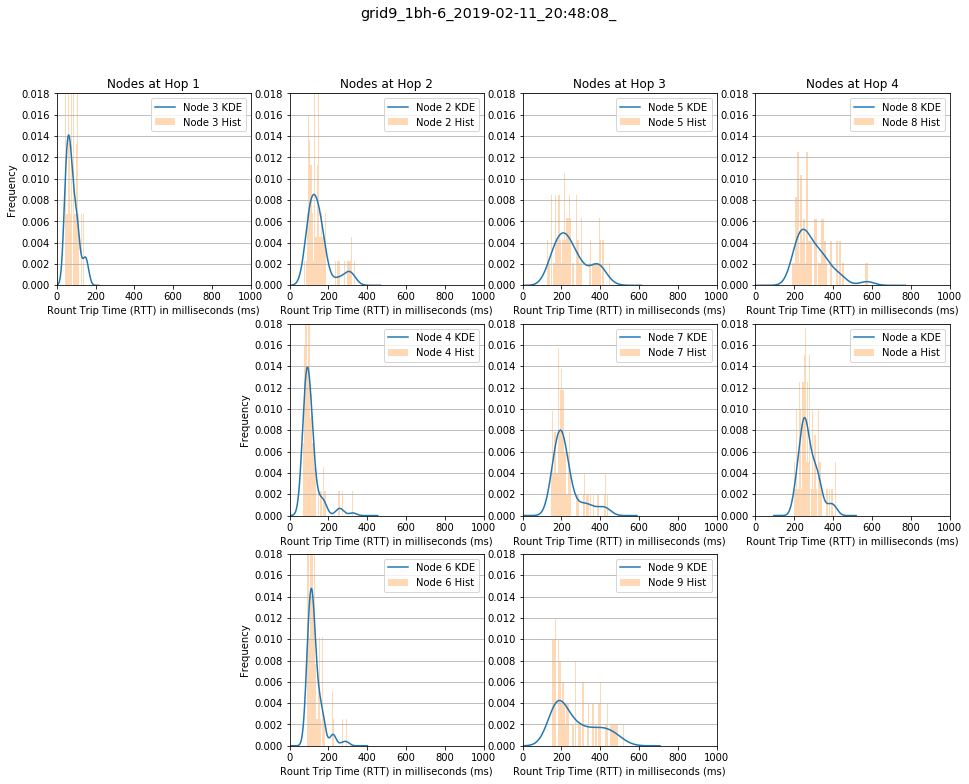

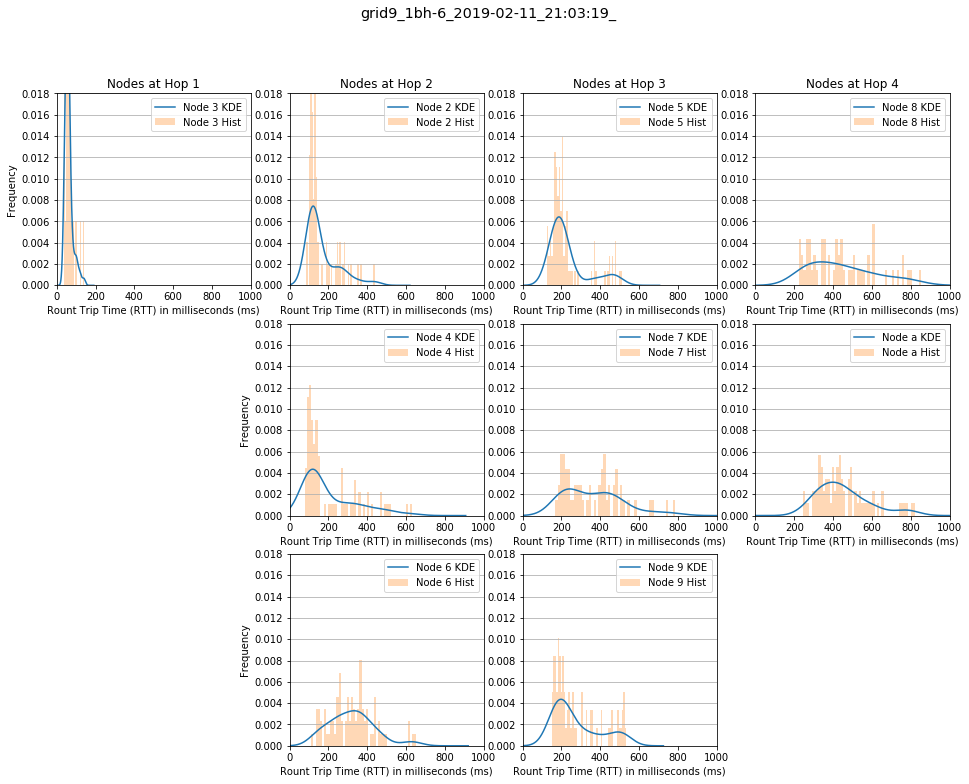

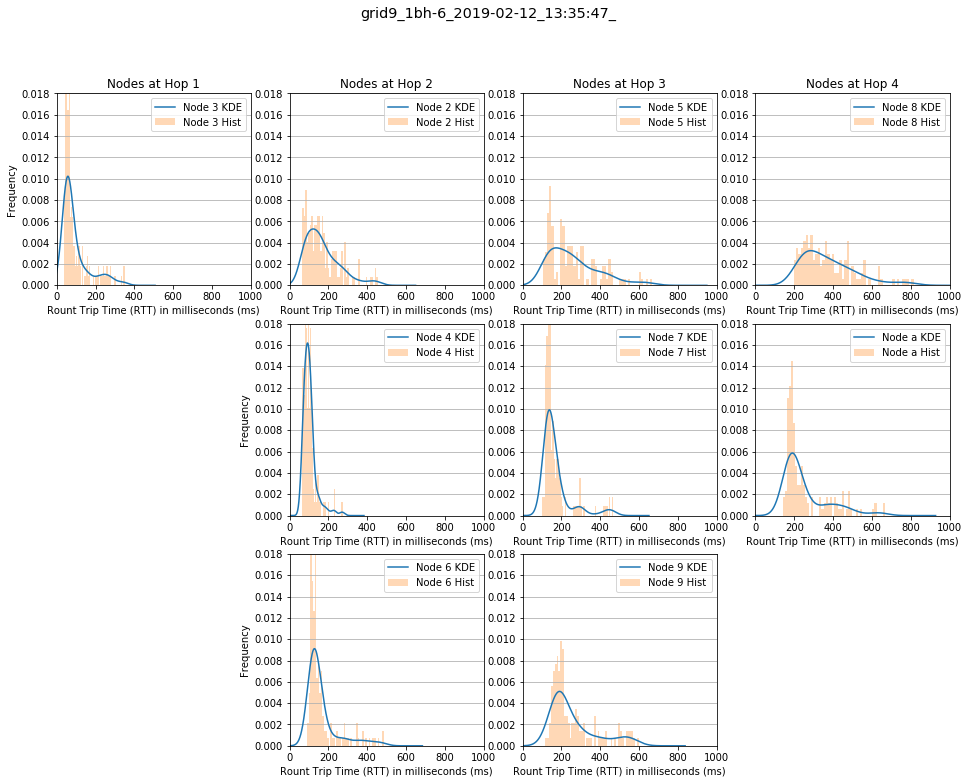

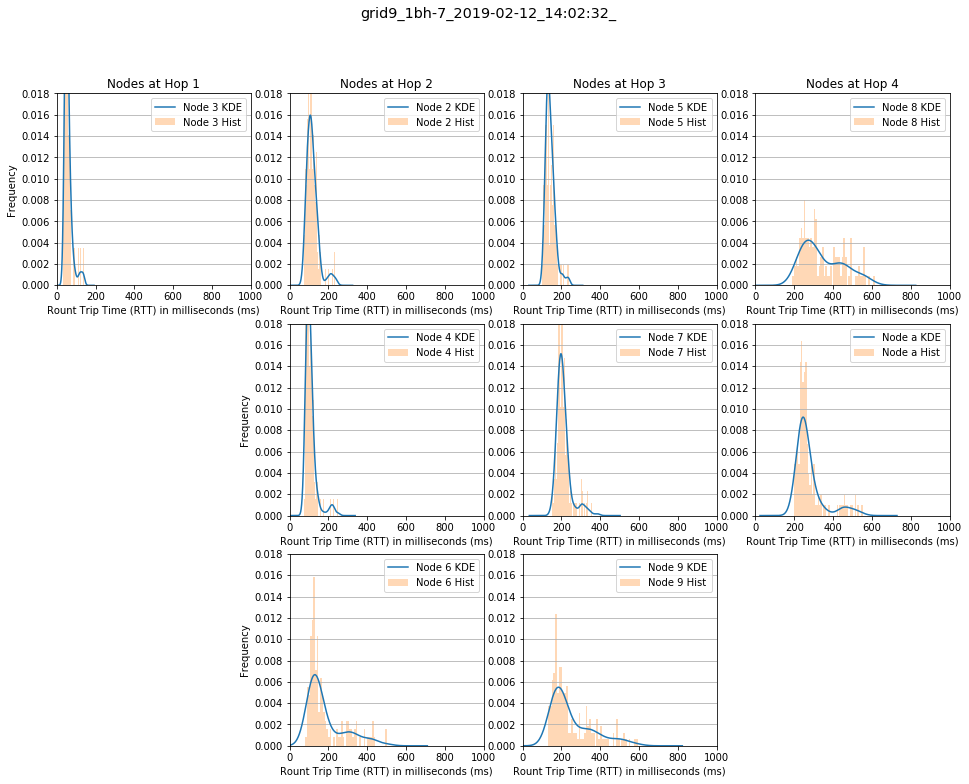

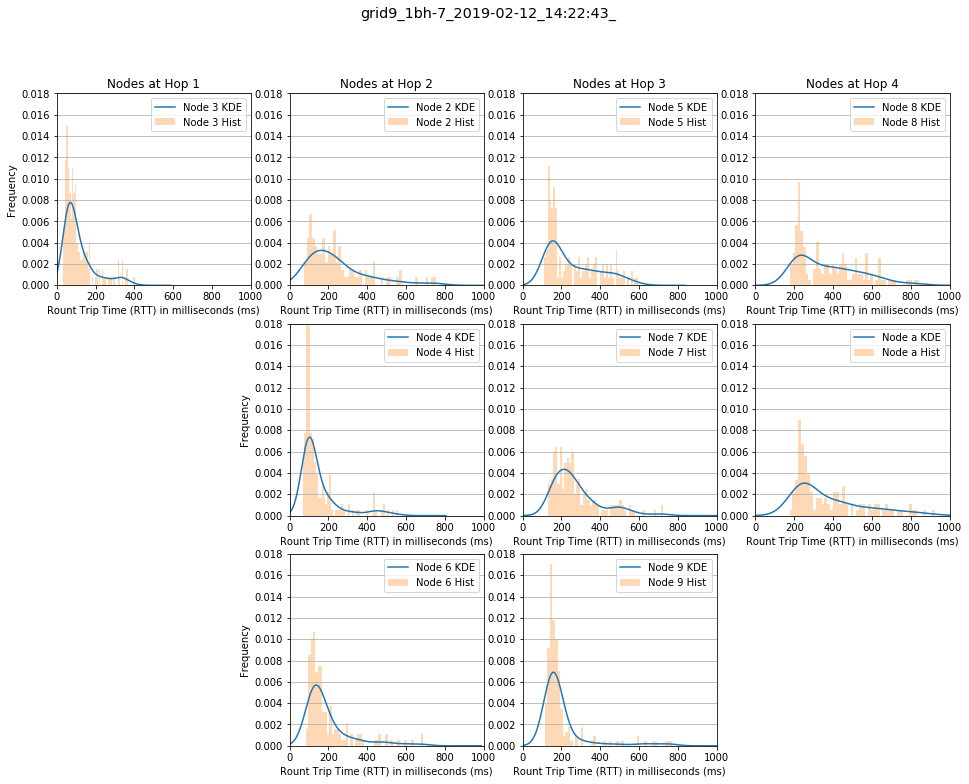

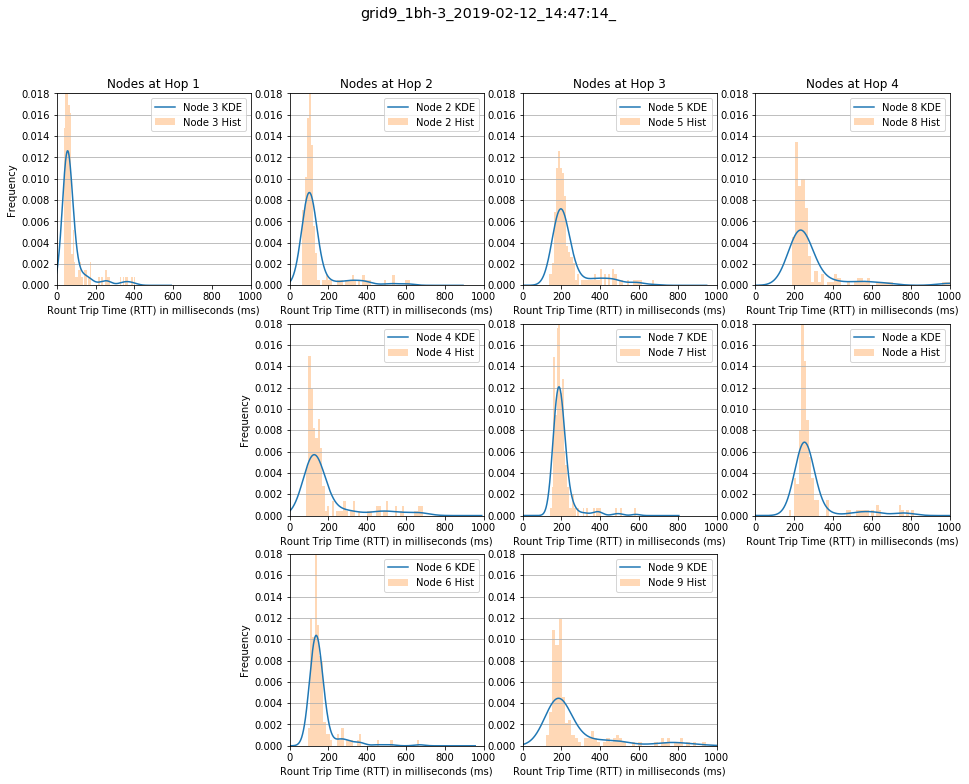

In [4]:
plots = [("traces/normal", 'grid9_normal_2019-02-11_17:51:17_'),
         ("traces/normal", 'grid9_normal_2019-02-11_20:22:01_'),
         ("traces/normal", 'grid9_normal_2019-02-11_21:03:19_'),
         ("traces/normal", 'grid9_normal_2019-02-12_14:02:32_'),
         ("traces/normal", 'grid9_normal_2019-02-12_14:22:43_'),
         ("traces/1bh-3", 'grid9_1bh-3_2019-02-12_14:47:14_'),         
         ("traces/1bh-6", 'grid9_1bh-6_2019-02-11_20:48:08_'),
         ("traces/1bh-6", 'grid9_1bh-6_2019-02-11_21:03:19_'),
         ("traces/1bh-6", 'grid9_1bh-6_2019-02-12_13:35:47_'),
         ("traces/1bh-7", 'grid9_1bh-7_2019-02-12_14:02:32_'),
         ("traces/1bh-7", 'grid9_1bh-7_2019-02-12_14:22:43_'),         
         ("traces/1bh-3", 'grid9_1bh-3_2019-02-12_14:47:14_')]

for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    plots_analysis.plot_histograms_hops_nodes(nodes, clean, 1000, 0.018, row[1])

Compute statistics for each node in every experiment

In [5]:
stats = None

for row in plots:
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    clean = trace_analysis.separate_outliers_by_node(packets_node)
    experiment = row[1]
    
    # Update stats
    if stats is None:
        stats = trace_statistics.compute_labeled_statistics(nodes, clean, experiment)
    else:
        stats = pd.concat([stats, trace_statistics.compute_labeled_statistics(nodes, clean, experiment)])

cols = ['label', 'node_id', 'hop', 'count', 'mean', 'var', 'std', 'min', 'max', 'loss']
stats = stats[cols].rename(index=str, columns={"label": "experiment", 'loss': 'loss (%)'}).sort_values(by=['experiment', 'hop']).reset_index(drop=True)


In [6]:
stats

experiment                node_id  hop  count  \
0    grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7403:3:303:    1    184   
1    grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7403:3:303:    1    184   
2    grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7404:4:404:    2    182   
3    grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7406:6:606:    2    154   
4    grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7402:2:202:    2    179   
5    grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7404:4:404:    2    182   
6    grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7406:6:606:    2    154   
7    grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7402:2:202:    2    179   
8    grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7405:5:505:    3    176   
9    grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7407:7:707:    3    167   
10   grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7409:9:909:    3    174   
11   grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7405:5:505:    3    176   
12   grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7407:7:707:    3    167   
13   grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7409:9:909:    3    174   
14   grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:740a:a:a0a:    4    156   
15   grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7408:8:808:    4    172   
16   grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:740a:a:a0a:    4    156   
17   grid9_1bh-3_2019-02-12_14:47:14_  fd00::212:7408:8:808:    4    172   
18   grid9_1bh-6_2019-02-11_20:48:08_  fd00::212:7403:3:303:    1     64   
19   grid9_1bh-6_2019-02-11_20:48:08_  fd00::212:7404:4:404:    2     85   
20   grid9_1bh-6_2019-02-11_20:48:08_  fd00::212:7402:2:202:    2     84   
21   grid9_1bh-6_2019-02-11_20:48:08_  fd00::212:7406:6:606:    2     94   
22   grid9_1bh-6_2019-02-11_20:48:08_  fd00::212:7405:5:505:    3     73   
23   grid9_1bh-6_2019-02-11_20:48:08_  fd00::212:7409:9:909:    3     68   
24   grid9_1bh-6_2019-02-11_20:48:08_  fd00::212:7407:7:707:    3     86   
25   grid9_1bh-6_2019-02-11_20:48:08_  fd00::212:7408:8:808:    4     62   
26   grid9_1bh-6_2019-02-11_20:48:08_  fd00::212:740a:a:a0a:    4     94   
27   grid9_1bh-6_2019-02-11_21:03:19_  fd00::212:7403:3:303:    1     81   
28   grid9_1bh-6_2019-02-11_21:03:19_  fd00::212:7404:4:404:    2     81   
29   grid9_1bh-6_2019-02-11_21:03:19_  fd00::212:7402:2:202:    2     69   
..                                ...                    ...  ...    ...   
51   grid9_1bh-7_2019-02-12_14:02:32_  fd00::212:7405:5:505:    3    191   
52   grid9_1bh-7_2019-02-12_14:02:32_  fd00::212:7408:8:808:    4    132   
53   grid9_1bh-7_2019-02-12_14:02:32_  fd00::212:740a:a:a0a:    4    147   
54   grid9_1bh-7_2019-02-12_14:22:43_  fd00::212:7403:3:303:    1    173   
55   grid9_1bh-7_2019-02-12_14:22:43_  fd00::212:7404:4:404:    2    183   
56   grid9_1bh-7_2019-02-12_14:22:43_  fd00::212:7402:2:202:    2     99   
57   grid9_1bh-7_2019-02-12_14:22:43_  fd00::212:7406:6:606:    2    156   
58   grid9_1bh-7_2019-02-12_14:22:43_  fd00::212:7405:5:505:    3    156   
59   grid9_1bh-7_2019-02-12_14:22:43_  fd00::212:7409:9:909:    3    174   
60   grid9_1bh-7_2019-02-12_14:22:43_  fd00::212:7407:7:707:    3    171   
61   grid9_1bh-7_2019-02-12_14:22:43_  fd00::212:7408:8:808:    4    147   
62   grid9_1bh-7_2019-02-12_14:22:43_  fd00::212:740a:a:a0a:    4    119   
63  grid9_normal_2019-02-11_17:51:17_  fd00::212:7403:3:303:    1     90   
64  grid9_normal_2019-02-11_17:51:17_  fd00::212:7404:4:404:    2     82   
65  grid9_normal_2019-02-11_17:51:17_  fd00::212:7402:2:202:    2     97   
66  grid9_normal_2019-02-11_17:51:17_  fd00::212:7406:6:606:    2     93   
67  grid9_normal_2019-02-11_17:51:17_  fd00::212:7405:5:505:    3     93   
68  grid9_normal_2019-02-11_17:51:17_  fd00::212:7409:9:909:    3     84   
69  grid9_normal_2019-02-11_17:51:17_  fd00::212:7407:7:707:    3     93   
70  grid9_normal_2019-02-11_17:51:17_  fd00::212:7408:8:808:    4     88   
71  grid9_normal_2019-02-11_17:51:17_  fd00::212:740a:a:a0a:    4     91   